In [ ]:
import pandas as pd
import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Bidirectional, LSTM, Dense
import nltk
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import confusion_matrix, classification_report

In [ ]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
# Load data
data = pd.read_csv("balancedtask1reddit.csv")

In [ ]:
data = data.drop(["Unnamed: 0.1", "Unnamed: 0"], axis = 1)

In [ ]:
data = data.dropna()

In [ ]:
# Preprocess text
data["chat1"] = data["chat1"].str.lower()
data["chat1"] = data["chat1"].str.replace("[^\w\s]", "")
data["chat1"] = data["chat1"].str.replace("\d+", "")
data["chat1"] = data["chat1"].str.strip()
data["chat1"] = data["chat1"].str.split()
data["chat2"] = data["chat2"].str.lower()
data["chat2"] = data["chat2"].str.replace("[^\w\s]", "")
data["chat2"] = data["chat2"].str.replace("\d+", "")
data["chat2"] = data["chat2"].str.strip()
data["chat2"] = data["chat2"].str.split()

<ipython-input-6-9c96dabc18ce>:3: FutureWarning: The default value of regex will change from True to False in a future version.
  data["chat1"] = data["chat1"].str.replace("[^\w\s]", "")
<ipython-input-6-9c96dabc18ce>:4: FutureWarning: The default value of regex will change from True to False in a future version.
  data["chat1"] = data["chat1"].str.replace("\d+", "")
<ipython-input-6-9c96dabc18ce>:8: FutureWarning: The default value of regex will change from True to False in a future version.
  data["chat2"] = data["chat2"].str.replace("[^\w\s]", "")
<ipython-input-6-9c96dabc18ce>:9: FutureWarning: The default value of regex will change from True to False in a future version.
  data["chat2"] = data["chat2"].str.replace("\d+", "")


In [ ]:
# Remove stop words
stop_words = set(stopwords.words('english'))
data["chat1"] = data["chat1"].apply(lambda x: [word for word in x if word not in stop_words])
data["chat2"] = data["chat2"].apply(lambda x: [word for word in x if word not in stop_words])

In [ ]:
# Tokenize text
tokenizer = Tokenizer()
tokenizer.fit_on_texts(data["chat1"])
sequences1 = tokenizer.texts_to_sequences(data["chat1"])
tokenizer.fit_on_texts(data["chat2"])
sequences2 = tokenizer.texts_to_sequences(data["chat2"])

In [ ]:
# Pad sequences
maxlen = 100
padded_sequences1 = pad_sequences(sequences1, maxlen=maxlen)
padded_sequences2 = pad_sequences(sequences2, maxlen=maxlen)

In [ ]:
padd = np.concatenate([padded_sequences1, padded_sequences2], axis = 1)

In [ ]:
# Encode labels
labels = pd.get_dummies(data["label"]).values

In [ ]:
# Split data
X_train, X_test, y_train, y_test = train_test_split(padd, labels, test_size=0.2, random_state=42)

In [ ]:
# Define model
model = Sequential()
model.add(Embedding(2 * (len(tokenizer.word_index) + 1), 128, input_length=2 * maxlen))
model.add(Bidirectional(LSTM(64, return_sequences=True)))
model.add(Bidirectional(LSTM(32)))
model.add(Dense(2, activation="softmax"))

In [ ]:
# Compile model
model.compile(optimizer="adam", loss="categorical_crossentropy", metrics=["accuracy"])

In [ ]:
# Train model
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=10, batch_size=64)

Epoch 1/10
8/8 [==============================] - 10s 413ms/step - loss: 0.6946 - accuracy: 0.4337 - val_loss: 0.6914 - val_accuracy: 0.6303
Epoch 2/10
8/8 [==============================] - 2s 206ms/step - loss: 0.6789 - accuracy: 0.7811 - val_loss: 0.6880 - val_accuracy: 0.4706
Epoch 3/10
8/8 [==============================] - 2s 203ms/step - loss: 0.6091 - accuracy: 0.9179 - val_loss: 0.6900 - val_accuracy: 0.5630
Epoch 4/10
8/8 [==============================] - 2s 208ms/step - loss: 0.3681 - accuracy: 0.9179 - val_loss: 0.8383 - val_accuracy: 0.5798
Epoch 5/10
8/8 [==============================] - 2s 209ms/step - loss: 0.0875 - accuracy: 0.9832 - val_loss: 1.6574 - val_accuracy: 0.5630
Epoch 6/10
8/8 [==============================] - 2s 213ms/step - loss: 0.0252 - accuracy: 0.9958 - val_loss: 2.1816 - val_accuracy: 0.5546
Epoch 7/10
8/8 [==============================] - 2s 204ms/step - loss: 0.1626 - accuracy: 0.9368 - val_loss: 2.1957 - val_accuracy: 0.5546
Epoch 8/10
8/8 [===

In [ ]:
y_pred = model.predict(X_test)
y_pred = np.argmax(y_pred, axis=1)

4/4 [==============================] - 2s 44ms/step


In [ ]:
y_test = np.argmax(y_test, axis=1)

In [ ]:
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.55      0.60      0.57        58
           1       0.58      0.52      0.55        61

    accuracy                           0.56       119
   macro avg       0.56      0.56      0.56       119
weighted avg       0.56      0.56      0.56       119

[[35 23]
 [29 32]]


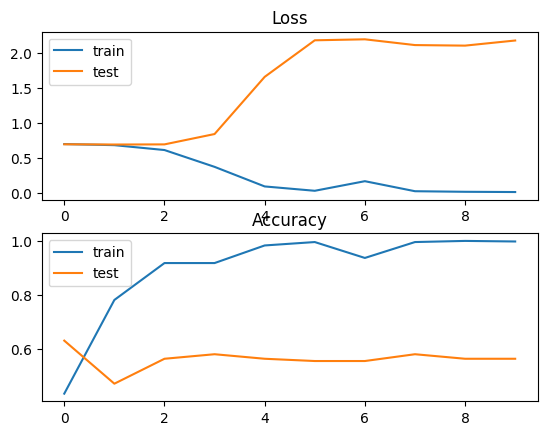

In [ ]:
from matplotlib import pyplot
# plot loss during training
pyplot.subplot(211)
pyplot.title('Loss')
pyplot.plot(history.history['loss'], label='train')
pyplot.plot(history.history['val_loss'], label='test')
pyplot.legend()
# plot accuracy during training
pyplot.subplot(212)
pyplot.title('Accuracy')
pyplot.plot(history.history['accuracy'], label='train')
pyplot.plot(history.history['val_accuracy'], label='test')
pyplot.legend()
pyplot.show()